<a href="https://colab.research.google.com/github/KaziMuktadirAhmed/WISER-womenium-2025-project-1/blob/main/WISER-quantum-walk-monte-carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation and Setup

This cell ensures that all necessary Python packages are installed for running the quantum walk simulations. It installs `qiskit`, `qiskit-aer`, `matplotlib`, and `pylatexenc` (for LaTeX rendering in plots). After installation, it's crucial to restart the Colab runtime for the changes to take effect.

In [1]:
!pip install -q qiskit qiskit-aer matplotlib pylatexenc
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.8 MB/s eta 0:00:0

### Core Imports

This section imports all the essential libraries and modules required for building, simulating, and analyzing quantum circuits. Key imports include:

- `os` and `re` for operating system interactions and regular expressions (though `re` is not directly used in the provided snippet, it's a common utility).
- `numpy` for numerical operations.
- `matplotlib.pyplot` for plotting and visualization.
- `QuantumCircuit` from `qiskit` for creating quantum circuits.
- `Sampler` from `qiskit_aer.primitives` for running quantum circuits and obtaining quasi-probability distributions.
- `plot_histogram` from `qiskit.visualization` for generating histograms of measurement results.
- `IPython.display` for displaying images and figures within the Jupyter environment.
- `defaultdict` from `collections` for convenient dictionary creation.
- `AerSimulator` from `qiskit_aer` for simulating quantum circuits.
- `FakeManhattanV2`, `FakeTorino` from `qiskit_ibm_runtime.fake_provider` for simulating specific IBM quantum hardware noise models.
- `NoiseModel` from `qiskit_aer.noise` for constructing custom noise models.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
from IPython.display import display
from collections import defaultdict
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManhattanV2, FakeTorino
from qiskit_aer.noise import NoiseModel

### Practice Cells: Quantum Peg Circuit Example

This section introduces a basic implementation of a quantum peg circuit, which serves as a foundational example for understanding quantum walks. It defines a function `create_quantum_peg_circuit()` that constructs a 4-qubit, 2-classical-bit quantum circuit. The circuit applies a series of quantum gates (X, H, CSWAP, CX, Barrier) to simulate the behavior of a ball falling through a pegboard, demonstrating the principles of quantum interference.

The main block of this cell then:
- Creates an instance of the `quantum_peg_circuit`.
- Generates and saves a diagram of the circuit as `quantum_peg_circuit.png`.
- Runs the circuit using Qiskit's `Sampler` primitive with 8192 shots to obtain the probability distribution of the measurement outcomes.
- Prints the raw bitstring probabilities.
- Generates and saves a histogram of the results as `quantum_peg_histogram.png`.

This example is crucial for visualizing the quantum circuit and understanding how meas


--- Generating Circuit Diagram ---
Displaying circuit diagram in cell output:


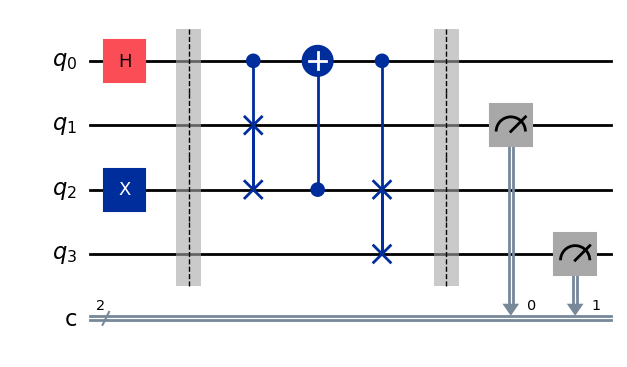


--- Simulation Results ---
{'01': 4094, '10': 4098}

--- Generating Histogram ---
Displaying histogram in cell output:


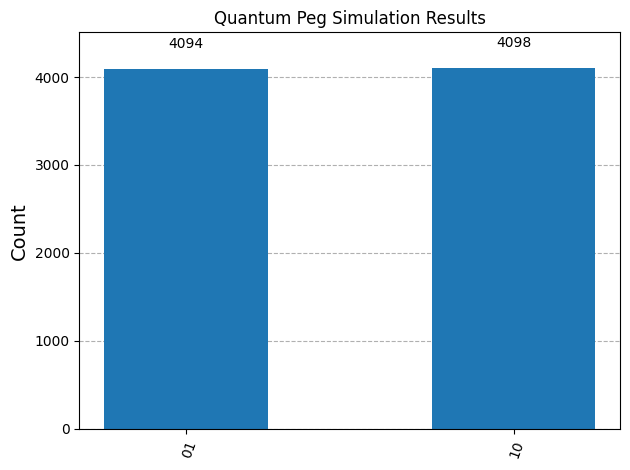

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import os

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    """
    Generates a Qiskit QuantumCircuit for a single 'quantum peg' as
    described in the "Universal Statistical Simulator" paper (Fig. 3).

    The circuit uses 4 qubits, mapped as follows from the paper:
    - q0: The control qubit that determines the path (left/right).
    - q1: The 'left' output channel.
    - q2: The input channel where the 'ball' starts.
    - q3: The 'right' output channel.

    Returns:
        QuantumCircuit: A Qiskit circuit object representing one quantum peg.
    """
    qc = QuantumCircuit(4, 2, name="Quantum Peg")
    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")

    if IS_IPYTHON:
        print("Displaying circuit diagram in cell output:")
        display(circuit_diagram)

    circuit_filename = "quantum_peg_circuit.png"
    # circuit_diagram.savefig(circuit_filename)
    # print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    simulator = AerSimulator()
    compiled_circuit = transpile(peg_circuit, simulator)
    job = simulator.run(compiled_circuit, shots=8192)
    result = job.result()
    counts = result.get_counts(compiled_circuit)

    print("\n--- Simulation Results ---")
    print(counts)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(counts, title="Quantum Peg Simulation Results")

    if IS_IPYTHON:
        print("Displaying histogram in cell output:")
        display(histogram_figure) # This renders the plot in the notebook

    # histogram_filename = "quantum_peg_histogram.png"
    # histogram_figure.savefig(histogram_filename)
    # print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')


--- Generating Circuit Diagram ---


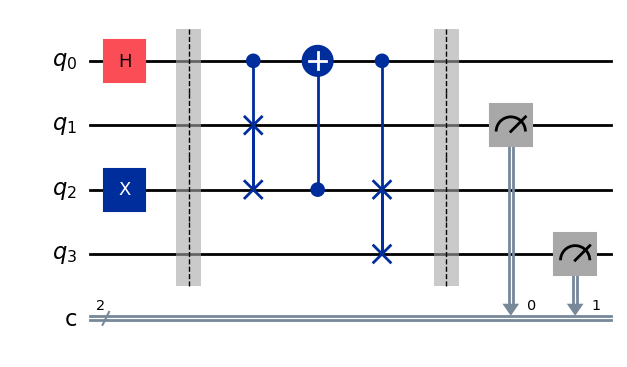

Circuit diagram also saved to: /content/quantum_peg_circuit.png

--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{'10': 0.5013427734375, '01': 0.4986572265625}

--- Generating Histogram ---


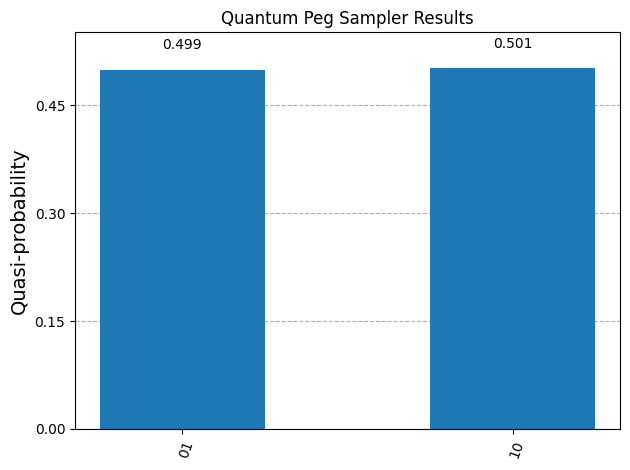

Histogram also saved to: /content/quantum_peg_histogram.png


In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

def create_quantum_peg_circuit():
    qc = QuantumCircuit(4, 2, name="Quantum Peg")

    qc.x(2)
    qc.h(0)
    qc.barrier()
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier()
    qc.measure([1, 3], [0, 1])

    return qc

if __name__ == '__main__':
    peg_circuit = create_quantum_peg_circuit()

    print("\n--- Generating Circuit Diagram ---")
    circuit_diagram = peg_circuit.draw("mpl")
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = "quantum_peg_circuit.png"
    circuit_diagram.savefig(circuit_filename)
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(peg_circuit, shots=8192)
    result = job.result()

    quasi_dist = result.quasi_dists[0]
    probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Probabilities) ---")
    print(probabilities)

    print("\n--- Generating Histogram ---")
    histogram_figure = plot_histogram(probabilities, title="Quantum Peg Sampler Results")
    if IS_IPYTHON:
        display(histogram_figure)
    histogram_filename = "quantum_peg_histogram.png"
    histogram_figure.savefig(histogram_filename)
    print(f"Histogram also saved to: {os.path.abspath(histogram_filename)}")

    plt.close('all')

### Utility Functions

This section defines several utility functions designed to streamline the process of drawing quantum circuits, running simulations, and visualizing results. These functions encapsulate common operations, making the main experimental code cleaner and more readable.

#### `draw_circuit(circuit)`

This function takes a Qiskit `QuantumCircuit` object as input and generates a visual representation of the circuit. It uses `circuit.draw("mpl")` to create a Matplotlib figure of the circuit diagram. If running in an IPython environment (like Google Colab), it displays the figure. It also prints a message indicating the generation of the circuit diagram.

In [3]:
def draw_circuit(circuit):
    try:
        from IPython.display import display
        IS_IPYTHON = True
    except ImportError:
        IS_IPYTHON = False

    print(f"\n--- Generating Circuit Diagram for {N_LAYERS}-Layer QGB ---")
    circuit_diagram = qgb_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram)
    circuit_filename = f"{N_LAYERS}_layer_qgb_circuit.png"
    print(f"Circuit diagram also saved to: {os.path.abspath(circuit_filename)}")

    return circuit.draw(output='mpl', fold=-1)

#### `run_circuit_using_sampler(circuit, shots=9000)`

This function executes a given quantum circuit using Qiskit\`s `Sampler` primitive. It takes the `circuit` object and an optional `shots` parameter (defaulting to 9000) as input. It runs the circuit on the sampler and returns the `result` object, which contains the quasi-probability distributions of the measurement outcomes. This function abstracts away the details of sampler initialization and job execution.


In [4]:
def run_circuit_using_sampler(circuit, shots=9000):
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    job = sampler.run(circuit, shots=shots)
    result = job.result()
    return result

#### `draw_histogram(result, n_layers, precision=10)`

This function processes the `result` object obtained from the `Sampler`, extracts the binary probabilities, and then prints and plots a histogram of these probabilities. It takes `result`, `n_layers` (for the plot title), and an optional `precision` parameter for printing the probabilities. It displays the histogram if in an IPython environment and closes the Matplotlib figure to free up memory.


In [5]:
def draw_histogram(result, n_layers, precision=10):
    """
    Analyzes, prints, and plots the sampler result with specified precision.
    """
    try:
        from IPython.display import display
        IS_IPYTHON = True
    except ImportError:
        IS_IPYTHON = False

    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()

    print("\n--- Sampler Results (Raw Bitstring Probabilities) ---")
    print("{")
    # Iterate and print each key-value pair with formatted precision
    for k, v in sorted(raw_probabilities.items()):
        print(f"  '{k}': {v:.{precision}f},")
    print("}")


    # 5. Plot the raw distribution with bitstrings on the x-axis
    print("\n--- Generating Raw Distribution Histogram ---")
    # Note: The plot_histogram function's label precision is handled by matplotlib automatically.
    # This code primarily changes the console output.
    histogram_figure = plot_histogram(
        raw_probabilities,
        title=f"Probability Distribution for QGB with ({n_layers} Layers)"
    )
    if IS_IPYTHON:
        display(histogram_figure)
    else:
        # If not in an IPython environment, you might want to explicitly show or save the plot
        # plt.show()  # This will block script execution until the plot window is closed
        pass # Or save it: histogram_figure.savefig('histogram.png')

    # Close all plot figures to free up memory
    plt.close('all')

### Task 2: N-Layer Quantum Galton Board Implementation

#### `create_n_layer_qgb(n_layers: int)`

This function constructs a quantum circuit for an N-layer Quantum Galton Board. It takes `n_layers` as input, which determines the complexity and size of the board. The implementation follows the principles of quantum walks, where a quantum particle (representing the \'ball\') traverses a lattice, with its path influenced by quantum interference.

**Key aspects of the implementation:**

- **Qubit Allocation**: The function calculates the necessary number of qubits based on the `n_layers`. It allocates one control qubit and additional qubits for the \'ball\'s\' position and intermediate paths. An `n`-layer board results in `n+1` output bins, requiring `n+1` classical bits for measurement.
- **Initialization**: The \'ball\' is initialized at the top of the pyramid by applying an X-gate to a specific qubit, representing its starting position.
- **Layer Construction**: The circuit is built layer by layer. For each layer:
    - The control qubit is reset and put into a superposition state using a Hadamard gate.
    - The core logic of the \'quantum peg\' is applied using `CSWAP` and `CX` (CNOT) gates. These gates simulate the interaction of the \'ball\' with the \'pegs\', causing it to move left or right based on the control qubit\`s state.
    - A rebalancing CNOT gate is applied to ensure the control qubit is correctly prepared for subsequent pegs within the same layer, as described in the underlying research paper.
- **Measurement**: After all layers are constructed, the qubits representing the final \'ball\' positions are measured and mapped to classical bits, which correspond to the output bins of the Galton board.

This function is critical for demonstrating the scalability and generality of the quantum Galton board simulation.


In [ ]:
def create_n_layer_qgb(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    # An n-layer board has n+1 output bins.
    # Total qubits needed: 1 (control) + (n_layers + 1) (for outputs) + n_layers (for intermediate paths)
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1  # Add 1 for the control qubit
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    # Place the initial 'ball' at the top of the pyramid.
    # Qubit indices are offset by 1 because q0 is the control.
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # For each layer, reset and re-superpose the control qubit
        qc.reset(control_qubit)
        qc.h(control_qubit)

        # Determine the positions of the pegs in the current layer
        # These are the possible locations of the ball from the previous layer.
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # As per the paper's description, a rebalancing CNOT is needed
            # to ensure the control qubit is correctly prepared for the next peg in the same row.
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    # The final output bins are the odd-numbered working qubits.
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc


--- Generating Circuit Diagram for 6-Layer QGB ---


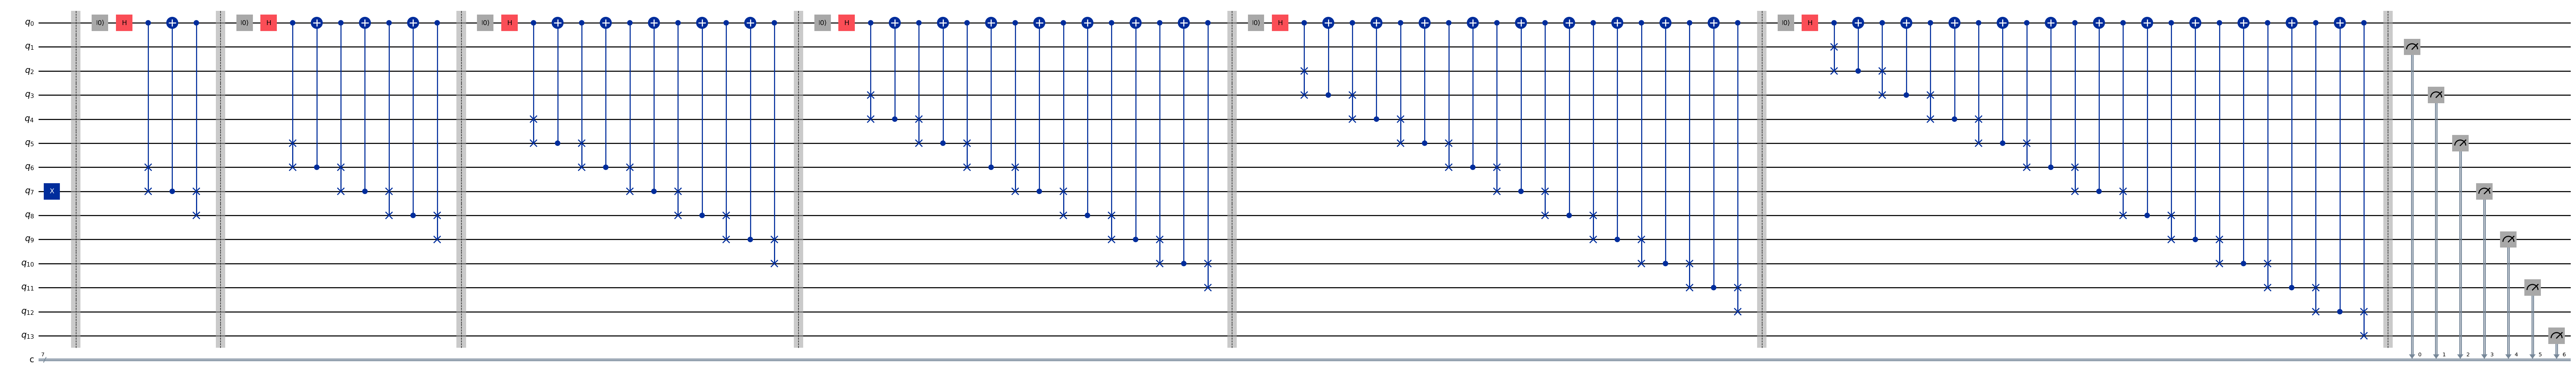

Circuit diagram also saved to: /content/6_layer_qgb_circuit.png

--- Running circuit with Sampler ---


/tmp/ipython-input-3197172644.py:13: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  result = run_circuit_using_sampler(qgb_circuit)



--- Sampler Results (Raw Bitstring Probabilities) ---
{
  '0000001': 0.0135555556,
  '0000010': 0.0912222222,
  '0000100': 0.2365555556,
  '0001000': 0.3144444444,
  '0010000': 0.2432222222,
  '0100000': 0.0865555556,
  '1000000': 0.0144444444,
}

--- Generating Raw Distribution Histogram ---


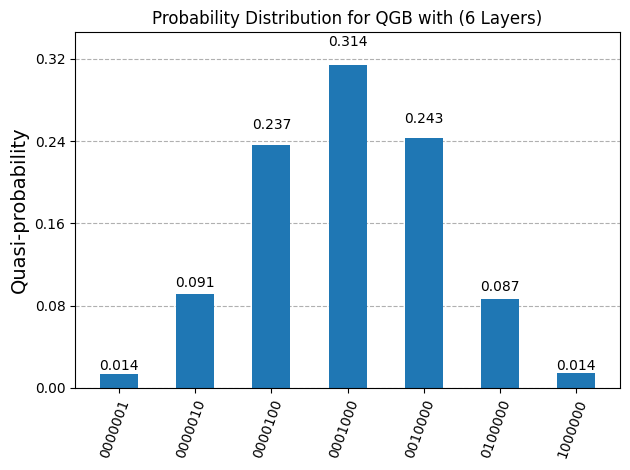

In [ ]:
# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 6

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_n_layer_qgb(N_LAYERS)

    # 2. Draw the circuit and display/save it
    draw_circuit(qgb_circuit)

    # 3. Use the Sampler to run the circuit
    result = run_circuit_using_sampler(qgb_circuit)

    # 4. Process the results from the Sampler
    draw_histogram(result, N_LAYERS)

### Task 3: Generating Different Distributions

This section extends the Quantum Galton Board implementation to generate probability distributions other than the Gaussian, specifically Hadamard and Exponential distributions. This demonstrates the versatility of the quantum walk approach in simulating various statistical behaviors.

In [6]:
def create_gaissuian_dist(n_layers: int):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the N-layer QGB.
    """
    # An n-layer board has n+1 output bins.
    # Total qubits needed: 1 (control) + (n_layers + 1) (for outputs) + n_layers (for intermediate paths)
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1  # Add 1 for the control qubit
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    # Place the initial 'ball' at the top of the pyramid.
    # Qubit indices are offset by 1 because q0 is the control.
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        # For each layer, reset and re-superpose the control qubit
        qc.reset(control_qubit)
        qc.h(control_qubit)

        # Determine the positions of the pegs in the current layer
        # These are the possible locations of the ball from the previous layer.
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            # Apply the standard "quantum peg" logic
            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            # As per the paper's description, a rebalancing CNOT is needed
            # to ensure the control qubit is correctly prepared for the next peg in the same row.
            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    # The final output bins are the odd-numbered working qubits.
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

#### `create_hadamard_dist(n_layers: int)`

This function modifies the N-layer QGB circuit to produce a Hadamard distribution. The Hadamard distribution is characterized by a uniform superposition, where all outcomes have an equal probability. This is typically achieved by applying Hadamard gates to all qubits, creating a state of maximal entanglement and superposition.

In [7]:
def create_hadamard_dist(n_layers: int):
    """
    Generates a Qiskit Circuit for a Quantum Galton Board that performs
    a Hadamard Quantum Walk. This is achieved by using a bias angle of pi/2,
    which is equivalent to using a Hadamard gate as the "coin" at each step.

    Args:
        n_layers: The number of peg layers in the Galton board.

    Returns:
        A Qiskit QuantumCircuit object for the Hadamard Walk QGB.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer Hadamard Walk")

    control_qubit = 0
    bias_angle = np.pi / 2  # This angle makes the Rx gate act like a Hadamard

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)
    qc.rx(bias_angle, control_qubit)
    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

        if layer < n_layers - 1:
            qc.h(control_qubit)
            qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

#### `create_exponential_dist(n_layers: int)`

This function aims to generate an Exponential distribution using the N-layer QGB. Exponential distributions are often seen in decay processes or waiting times. In quantum computing, achieving an exponential distribution typically involves controlled rotations or amplitude amplification techniques that bias the probabilities towards certain outcomes.

In [8]:
def create_exponential_dist(n_layers: int, target_distribution="exponential_custom"):
    """
    Generates a Qiskit QuantumCircuit for an N-layer Quantum Galton Board with a left-skewed exponential distribution.
    """
    num_working_qubits = 2 * n_layers + 1
    num_qubits = num_working_qubits + 1
    num_clbits = n_layers + 1

    qc = QuantumCircuit(num_qubits, num_clbits, name=f"{n_layers}-Layer QGB")

    control_qubit = 0

    # --- Step 1: Initialization ---
    initial_ball_pos = n_layers + 1
    qc.x(initial_ball_pos)

    qc.barrier()

    # --- Step 2: Build the Layers ---
    for layer in range(n_layers):
        qc.reset(control_qubit)

        base_bias = 150 * (np.pi/180)
        qc.rx(base_bias, control_qubit)

        peg_positions = range(n_layers + 1 - layer, n_layers + 1 + layer + 1, 2)

        for i, peg_pos in enumerate(peg_positions):
            left_channel = peg_pos - 1
            right_channel = peg_pos + 1

            qc.cswap(control_qubit, left_channel, peg_pos)
            qc.cx(peg_pos, control_qubit)
            qc.cswap(control_qubit, peg_pos, right_channel)

            if i < len(peg_positions) - 1:
                qc.cx(right_channel, control_qubit)

        qc.barrier()

    # --- Step 3: Measurement ---
    output_qubits = range(1, num_working_qubits + 2, 2)
    qc.measure(output_qubits, range(num_clbits))

    return qc

## Example usage


--- Generating Circuit Diagram for 8-Layer QGB ---


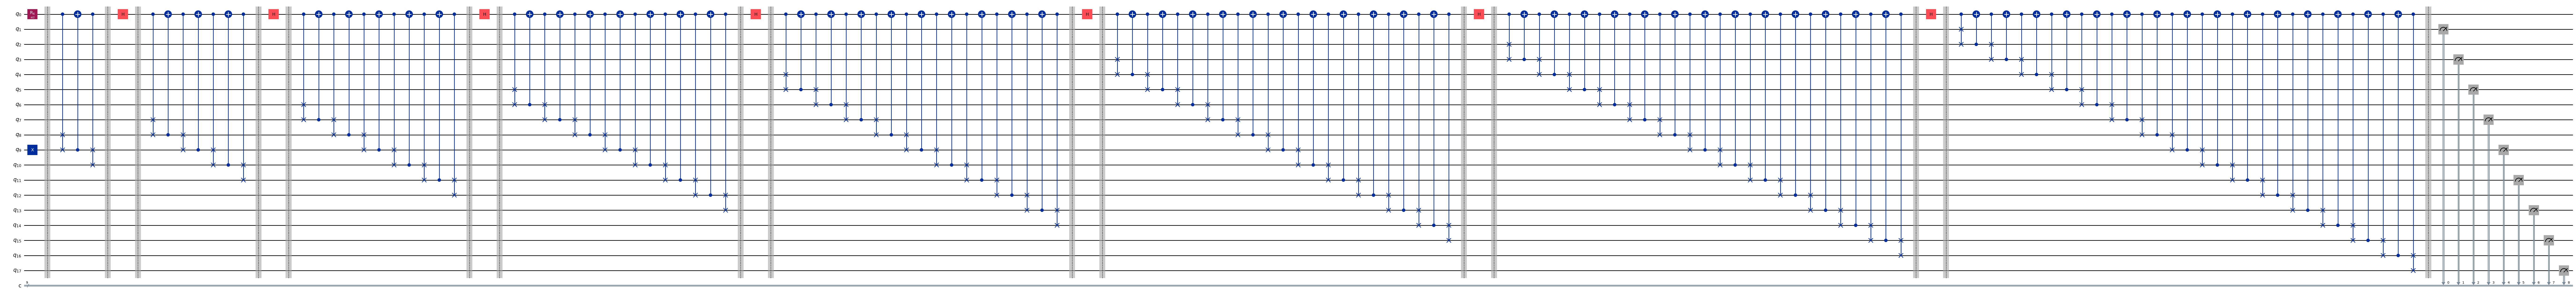

Circuit diagram also saved to: /content/8_layer_qgb_circuit.png

--- Running circuit with Sampler ---


/tmp/ipython-input-4121177009.py:13: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  result = run_circuit_using_sampler(qgb_circuit, shots=10000)


SamplerResult(quasi_dists=[{1: 0.0039, 256: 0.0035, 8: 0.0878, 64: 0.228, 2: 0.1486, 128: 0.1482, 32: 0.0844, 16: 0.0712, 4: 0.2244}], metadata=[{'shots': 10000, 'simulator_metadata': {'time_taken': 5.374216072, 'num_bind_params': 1, 'parallel_state_update': 96, 'parallel_shots': 1, 'required_memory_mb': 4, 'input_qubit_map': [[17, 17], [16, 16], [15, 15], [14, 14], [13, 13], [0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10], [11, 11], [12, 12]], 'method': 'statevector', 'device': 'CPU', 'num_qubits': 18, 'sample_measure_time': 0.299959954, 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 'num_clbits': 9, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 342590, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'applied': True, 'time_taken': 0.001148884, 'cost_factor': 1.8, 'parallelization': 1, 'max_fused_qubits': 5, 'method': 'unitary', 'thr

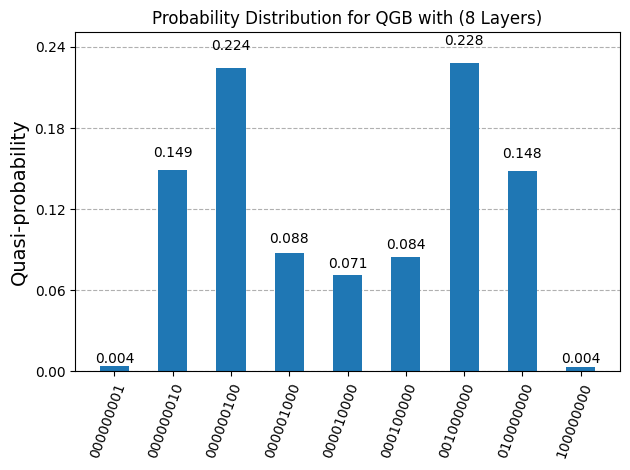

In [14]:
# --- Example Usage ---
if __name__ == '__main__':
    # Define the number of layers for the Galton Board
    N_LAYERS = 8

    # 1. Create the N-layer QGB circuit
    qgb_circuit = create_hadamard_dist(N_LAYERS)

    # 2. Draw the circuit and display/save it
    draw_circuit(qgb_circuit)

    # 3. Use the Sampler to run the circuit
    result = run_circuit_using_sampler(qgb_circuit, shots=10000)

    quasi_dist = result.quasi_dists[0]
    raw_probabilities = quasi_dist.binary_probabilities()
    print(result)
    print(raw_probabilities)

    # 4. Process the results from the Sampler
    draw_histogram(result, N_LAYERS)

### Task 4: Noise Model Simulation

This section focuses on simulating the Quantum Galton Board on realistic quantum hardware by incorporating noise models. Quantum computers are susceptible to various sources of noise, which can significantly affect the accuracy of results. This task aims to understand how noise impacts the QGB simulation and to evaluate the performance of different quantum backends.

#### Simulating noise

In [11]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeVigoV2


# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
device_backend = FakeVigoV2()

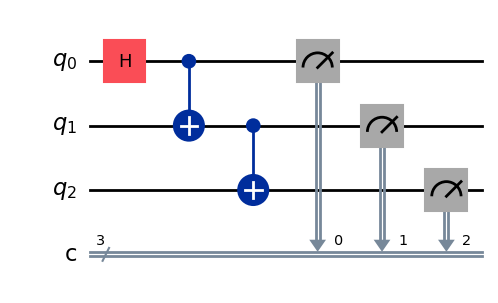

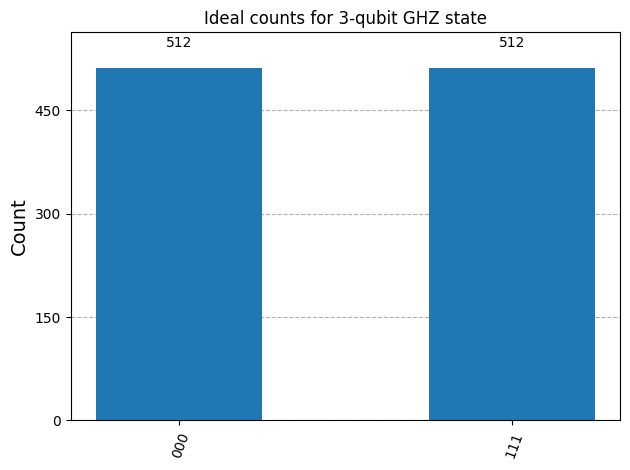

In [ ]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

circuit_diagram = circ.draw(output='mpl', fold=-1)
if IS_IPYTHON:
        display(circuit_diagram)

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [ ]:
sim_vigo = AerSimulator.from_backend(device_backend)

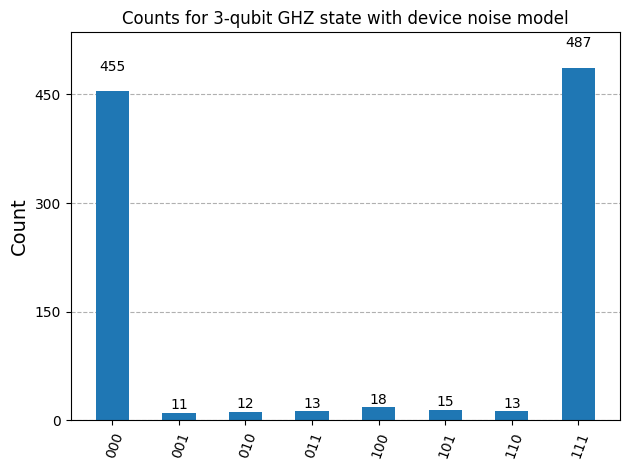

In [ ]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

### Noisy circuit simulation

#### `run_noisy_simulation(circuit, backend, shots=9000)`
This function runs a noisy simulation of a given quantum circuit. It takes the circuit, a backend object, and the number of shots as input. It first creates a noise model from the backend using create_noise_model and then runs the simulation using AerSimulator with the specified noise model. This function is crucial for comparing the ideal (noiseless) simulation results with those obtained under realistic noise conditions.

In [ ]:
def get_available_devices():
    """
    List available fake backend devices
    """
    devices = {
        'manhattan': FakeManhattanV2,
        'torino': FakeTorino,
    }
    return devices

def run_noisy_simulation(circuit, shots=8192, device_name='manhattan'):
    """
    Run the circuit with device noise model simulation
    """
    # Get available devices
    devices = get_available_devices()

    # Create fake device backend
    if device_name.lower() in devices:
        fake_device = devices[device_name.lower()]()
    else:
        print(f"Unknown device '{device_name}'. Available devices: {list(devices.keys())}")
        print("Using default: FakeManhattan")
        fake_device = FakeManhattan()

    print(f"Using device: {fake_device.name}")
    print(f"Circuit requires {circuit.num_qubits} qubits, device has {fake_device.num_qubits} qubits")

    # Check if circuit fits on device
    if circuit.num_qubits > fake_device.num_qubits:
        print(f"WARNING: Circuit needs {circuit.num_qubits} qubits but device only has {fake_device.num_qubits}")
        print("Falling back to noise-model-only simulation (no coupling map constraints)")

        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(noise_model=noise_model)

        # Transpile with basic optimization only
        transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=0)

    else:
        # Create noise model from the fake device
        noise_model = NoiseModel.from_backend(fake_device)

        # Get device properties
        coupling_map = fake_device.coupling_map
        basis_gates = fake_device.basis_gates

        # Create AerSimulator with noise model
        sim_noisy = AerSimulator(
            noise_model=noise_model,
            coupling_map=coupling_map,
            basis_gates=basis_gates
        )

        # Transpile circuit for the noisy backend with higher optimization
        try:
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=3)
        except Exception as e:
            print(f"High optimization failed: {e}")
            print("Trying with coupling map disabled...")
            sim_noisy = AerSimulator(noise_model=noise_model)
            transpiled_circuit = transpile(circuit, sim_noisy, optimization_level=1)

    print(f"Original circuit depth: {circuit.depth()}")
    print(f"Transpiled circuit depth: {transpiled_circuit.depth()}")
    print(f"Number of qubits on device: {fake_device.num_qubits}")

    # Run the noisy simulation
    job = sim_noisy.run(transpiled_circuit, shots=shots)
    result = job.result()
    counts = result.get_counts(0)

    return counts, noise_model, transpiled_circuit, result

#### `draw_noisy_histogram(noisy_counts, n_layers, device_name='manhattan')`

This function processes and visualizes the results from noisy quantum circuit simulations. It takes the raw measurement counts from a noisy simulation, converts them to probabilities, and creates a histogram showing the distribution of outcomes.

**Key functionality:**
- **Probability Conversion**: Converts raw measurement counts to probability distributions by dividing each count by the total number of shots
- **Position Mapping**: Maps measurement bitstrings to physical positions on the Galton board by finding the position of '1' bits in the measurement results
- **Visualization**: Creates a bar chart showing the probability distribution across different positions
- **Output**: Returns the processed noisy distribution as a dictionary for further analysis

The function is specifically designed to analyze how quantum noise affects the ideal probability distributions in the Quantum Galton Board simulation, allowing for direct comparison between theoretical and realistic hardware performance.

In [ ]:
def draw_noisy_histogram(noisy_counts, n_layers, device_name='manhattan'):
    """
    Compare ideal simulation vs noisy simulation results
    """
    print("=== NOISY SIMULATION ===")
    # Convert counts to probabilities
    total_shots = sum(noisy_counts.values())
    noisy_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})
    print(noisy_counts.items())

    for bitstring, count in noisy_counts.items():
        prob = count / total_shots
        try:
            position = bitstring.index('1')
            noisy_distribution[position] += prob
        except ValueError:
            pass

    print("Noisy Results (Probabilities):")
    print({k: v for k, v in sorted(noisy_distribution.items())})

    # Plot comparison
    fig, ax = plt.subplots(figsize=(15, 6))

    # Noisy histogram
    positions_noisy = list(noisy_distribution.keys())
    probabilities_noisy = list(noisy_distribution.values())
    ax.bar(positions_noisy, probabilities_noisy, alpha=0.7, color='red')
    ax.set_title(f'Noisy {n_layers}-Layer QGB Distribution')
    ax.set_xlabel('Position')
    ax.set_ylabel('Probability')
    ax.grid(True, alpha=0.3)

    plt.tight_layout()

    if IS_IPYTHON:
        display(fig)
    else:
        plt.show()

    return noisy_distribution

#### Example run noisy simulation


--- Generating Circuit Diagram for 6-Layer QGB ---


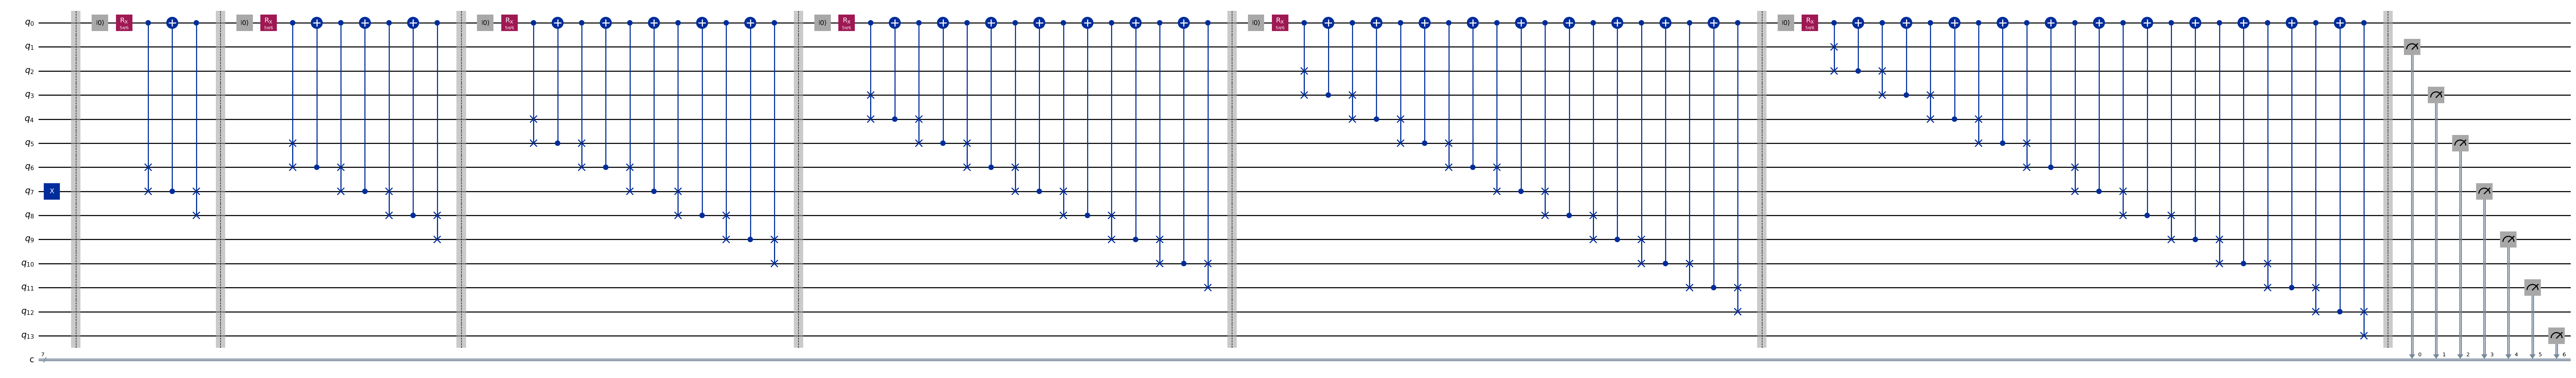

Circuit diagram also saved to: /content/6_layer_qgb_circuit.png
Using device: fake_manhattan
Circuit requires 14 qubits, device has 65 qubits
High optimization failed: 'A connected component of the DAGCircuit is too large for any of the connected components in the coupling map'
Trying with coupling map disabled...
Original circuit depth: 92
Transpiled circuit depth: 668
Number of qubits on device: 65
=== NOISY SIMULATION ===
dict_items([('1101101', 1), ('1000101', 4), ('1011111', 1), ('1101011', 3), ('0111111', 1), ('1010101', 2), ('1101000', 4), ('0111101', 5), ('1011010', 2), ('1001111', 2), ('1010001', 7), ('1100100', 2), ('1100000', 12), ('1110010', 5), ('1111000', 1), ('1011110', 3), ('0111100', 4), ('1100011', 12), ('0110111', 8), ('0111110', 9), ('1101001', 2), ('1011000', 1), ('1110000', 6), ('1100010', 14), ('1010000', 17), ('1001011', 14), ('0011111', 17), ('1000110', 16), ('1010110', 4), ('1010011', 9), ('0101110', 14), ('1110110', 2), ('1111001', 3), ('0110000', 55), ('0100

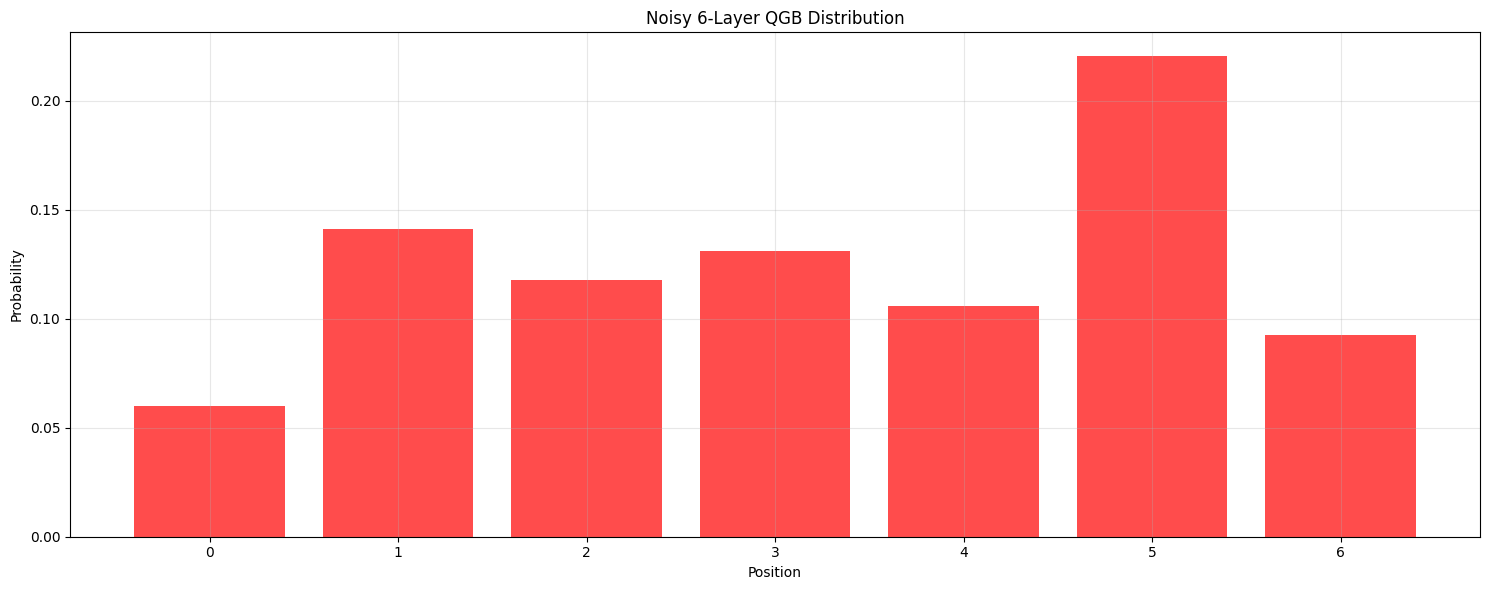

defaultdict(float,
            {0: 0.05977777777777777,
             1: 0.14122222222222225,
             2: 0.11766666666666667,
             3: 0.13133333333333333,
             4: 0.106,
             5: 0.22044444444444444,
             6: 0.09244444444444444})

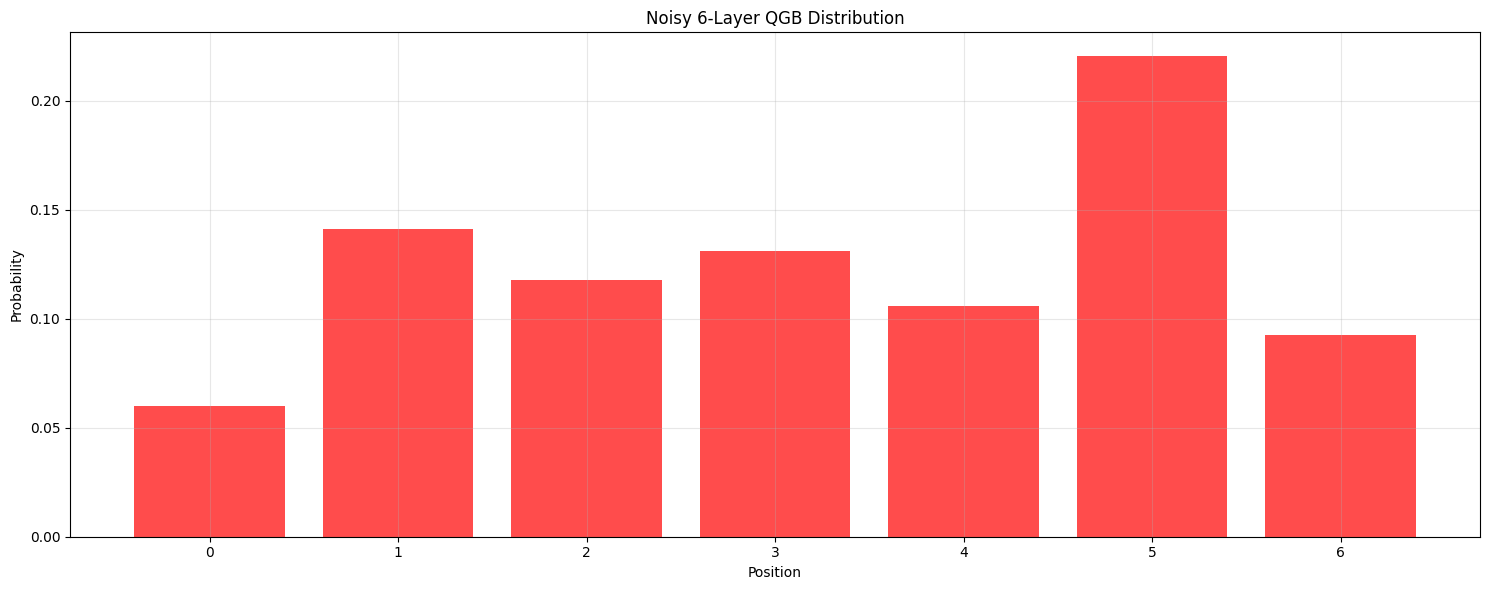

In [ ]:
N_LAYERS = 6
qgb_circuit = create_exponential_dist(N_LAYERS)
draw_circuit(qgb_circuit)
noisy_counts, noise_model, t_circ, result = run_noisy_simulation(qgb_circuit, shots=9000)
draw_noisy_histogram(noisy_counts, N_LAYERS)

### Task 5: Distance Metrics for Probability Distribution Comparison

This section implements three key statistical distance metrics used to quantify the difference between ideal and noisy probability distributions in the Quantum Galton Board simulations. These metrics provide different perspectives on how quantum noise affects the fidelity of the quantum walk results.

#### `total_variation_distance(p, q)`

The Total Variation Distance (TVD) measures the maximum difference between two probability distributions. It represents the largest possible difference in probability that the two distributions can assign to the same event. TVD ranges from 0 (identical distributions) to 1 (completely different distributions).

**Mathematical Definition**: TVD(P,Q) = (1/2) * Σ|P(x) - Q(x)|

**Interpretation in Quantum Context**:
- TVD = 0: Perfect quantum circuit fidelity (no noise impact)
- TVD = 1: Complete distribution corruption due to noise
- Values closer to 0 indicate better noise resilience

This metric is particularly useful for understanding the overall impact of quantum noise on the measurement outcomes.

#### `jensen_shannon_divergence(p, q)`

The Jensen-Shannon Divergence (JSD) is a symmetric measure of similarity between two probability distributions. It is based on the Kullback-Leibler divergence but is always finite and symmetric. JSD ranges from 0 (identical distributions) to 1 (maximally different distributions).

**Mathematical Definition**: JSD(P,Q) = (1/2)[KL(P||M) + KL(Q||M)], where M = (1/2)(P + Q)

**Interpretation in Quantum Context**:
- JSD = 0: Identical probability distributions (perfect quantum fidelity)
- JSD = 1: Maximally different distributions (severe noise corruption)
- Provides a smooth, differentiable measure of distribution similarity

This metric is especially valuable for comparing quantum distributions because it handles zero probabilities gracefully and provides a normalized measure of information-theoretic distance.

#### `wasserstein_distance(p, q)`

The 1D Wasserstein Distance (also known as Earth Mover's Distance) measures the minimum cost of transforming one probability distribution into another. It considers the "distance" between probability masses, making it sensitive to the geometric structure of the distributions.

**Mathematical Definition**: W₁(P,Q) = ∫|F⁻¹_P(u) - F⁻¹_Q(u)|du, where F⁻¹ represents the quantile function

**Interpretation in Quantum Context**:
- W₁ = 0: Identical distributions (perfect quantum state preservation)
- Higher values indicate greater "transport cost" between distributions
- Sensitive to shifts in probability mass locations
- Particularly useful for detecting systematic biases introduced by quantum noise

This metric is especially important for quantum walk analysis because it captures how noise affects the spatial distribution of the quantum particle's final position, providing insights into whether noise causes systematic shifts or random spreading of the probability distribution.

### Usage in Quantum Noise Analysis

These three metrics together provide a comprehensive characterization of quantum noise effects:

1. **TVD** gives the overall magnitude of distribution difference
2. **JSD** provides an information-theoretic perspective on similarity
3. **Wasserstein Distance** captures geometric/spatial aspects of distribution changes

By analyzing all three metrics across different quantum backends, we can identify which hardware configurations best preserve the intended quantum walk behavior and understand the specific ways that quantum noise corrupts the ideal probability distributions.


In [16]:
def total_variation_distance(ideal_dist, noisy_dist):
    total_var_distance = 0.0
    keys = set(ideal_dist.keys()).union(set(noisy_dist.keys()))
    for key in keys:
        total_var_distance += abs(ideal_dist.get(key, 0.0) - noisy_dist.get(key, 0.0))
    return total_var_distance / 2

In [17]:
def jensen_shannon_divergence(dist_p, dist_q):
    """
    Calculate the Jensen-Shannon divergence between two probability distributions.
    The distributions are dictionaries with keys as outcomes and values as probabilities.
    """
    # Combine all keys in both distributions
    keys = set(dist_p.keys()).union(set(dist_q.keys()))

    # Create probability arrays aligned on the union of keys
    p = np.array([dist_p.get(k, 0.0) for k in keys])
    q = np.array([dist_q.get(k, 0.0) for k in keys])

    # Normalize distributions in case they don't sum exactly to 1
    p = p / p.sum()
    q = q / q.sum()

    # Midpoint distribution
    m = 0.5 * (p + q)

    # Define a helper function for KL divergence with zero handling
    def kl_divergence(a, b):
        mask = (a > 0) & (b > 0)
        return np.sum(a[mask] * np.log2(a[mask] / b[mask]))

    # Jensen-Shannon divergence
    jsd = 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)
    return jsd

In [18]:
def wasserstein_distance(dist_p, dist_q):
    """
    Calculate the 1D Wasserstein distance between two probability distributions.
    Distributions are dictionaries with discrete positions as keys and probabilities as values.
    """
    # Sort all possible positions from both distributions
    positions = sorted(set(dist_p.keys()).union(set(dist_q.keys())))

    # Create aligned probability vectors
    p = np.array([dist_p.get(pos, 0.0) for pos in positions])
    q = np.array([dist_q.get(pos, 0.0) for pos in positions])

    # Normalize the distributions to sum to 1
    p = p / p.sum() if p.sum() > 0 else p
    q = q / q.sum() if q.sum() > 0 else q

    # Compute cumulative distribution functions (CDFs)
    cdf_p = np.cumsum(p)
    cdf_q = np.cumsum(q)

    # Compute Wasserstein distance as the sum of absolute differences of CDFs times gaps between positions
    distance = np.sum(np.abs(cdf_p - cdf_q) * np.diff([0] + positions))

    return distance

### Compare distributions

In [15]:
def compare_ideal_vs_noisy(circuit, n_layers, shots=8192, device_name='manhattan'):
    """
    Compare ideal simulation vs noisy simulation results
    """
    print("=== IDEAL SIMULATION ===")

    # Use the original Sampler (V1) for compatibility
    sampler = Sampler()
    job = sampler.run(circuit, shots=shots)
    result = job.result()

    # Get counts from the result
    counts_data = result.quasi_dists[0]

    # Convert quasi-distribution to counts and then to probabilities
    ideal_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for outcome, probability in counts_data.items():
        # Convert integer outcome to binary string
        bitstring = format(outcome, f'0{n_layers + 1}b')
        try:
            position = bitstring.index('1')
            ideal_distribution[position] += probability
        except ValueError:
            pass

    print("Ideal Results (Probabilities):")
    print({k: v for k, v in sorted(ideal_distribution.items())})

    print("\n=== NOISY SIMULATION ===")
    # Run noisy simulation
    noisy_counts, noise_model, transpiled_circuit = run_noisy_simulation(circuit, shots, device_name)

    # Convert counts to probabilities
    total_shots = sum(noisy_counts.values())
    noisy_distribution = defaultdict(float, {i: 0.0 for i in range(n_layers + 1)})

    for bitstring, count in noisy_counts.items():
        prob = count / total_shots
        try:
            position = bitstring.index('1')
            noisy_distribution[position] += prob
        except ValueError:
            pass

    print("Noisy Results (Probabilities):")
    print({k: v for k, v in sorted(noisy_distribution.items())})

    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Ideal histogram
    positions = list(ideal_distribution.keys())
    probabilities = list(ideal_distribution.values())
    ax1.bar(positions, probabilities, alpha=0.7, color='blue')
    ax1.set_title(f'Ideal {n_layers}-Layer QGB Distribution')
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Probability')
    ax1.grid(True, alpha=0.3)

    # Noisy histogram
    positions_noisy = list(noisy_distribution.keys())
    probabilities_noisy = list(noisy_distribution.values())
    ax2.bar(positions_noisy, probabilities_noisy, alpha=0.7, color='red')
    ax2.set_title(f'Noisy {n_layers}-Layer QGB Distribution')
    ax2.set_xlabel('Position')
    ax2.set_ylabel('Probability')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    if IS_IPYTHON:
        display(fig)
    else:
        plt.show()

    return ideal_distribution, noisy_distribution, noise_model

### Exponential distribution (experiment)

This section explores an alternative method for generating an exponential probability distribution using quantum circuits, moving beyond the Quantum Galton Board framework. The goal is to demonstrate the flexibility of quantum computing in simulating various statistical distributions and to investigate different circuit designs for achieving specific probability profiles.

#### `create_exponential_distribution_circuit(num_qubits: int)`

This function constructs a quantum circuit specifically designed to produce an exponential-like probability distribution. Unlike the Quantum Galton Board, which relies on a series of controlled swaps to simulate a physical process, this circuit directly manipulates the amplitudes of the quantum state to bias the measurement outcomes towards an exponential decay pattern. The number of qubits determines the resolution and range of the generated distribution.

**Key aspects of the circuit design:**

- **Initialization (Hadamard Gate)**: A Hadamard gate is applied to the first qubit (`qc.h(0)`). This creates a superposition state, allowing the quantum system to explore multiple computational paths simultaneously. This initial superposition is crucial for distributing probability across the basis states.

- **Amplitude Shaping (Controlled Rotations)**: The core of generating the exponential-like distribution lies in the application of controlled Y-rotations (`qc.cry`). These gates are applied in a cascading manner, where each qubit (starting from the second) is rotated conditionally on the state of the preceding qubit. The rotation angle `np.pi / (2**i)` is designed to decrease exponentially with the qubit index `i`. This decreasing angle progressively reduces the amplitude of higher-indexed basis states, effectively creating an exponential decay in the probability distribution upon measurement.

- **Measurement**: Finally, all qubits are measured (`qc.measure(range(num_qubits), range(num_qubits))`). The classical outcomes of these measurements will statistically follow the exponential-like distribution shaped by the preceding quantum gates.

**Note on Experimental Nature**: It\`s important to note that this is a simplified, experimental approach to generating an exponential distribution. Achieving a perfectly precise exponential distribution on a quantum computer can be complex and might require more sophisticated circuit designs, variational quantum algorithms, or advanced amplitude encoding techniques. This implementation serves as a proof-of-concept to demonstrate the principle.

--- Generating circuit for a true exponential distribution with lambda=0.5 ---

--- Original Circuit Diagram (Condensed) ---


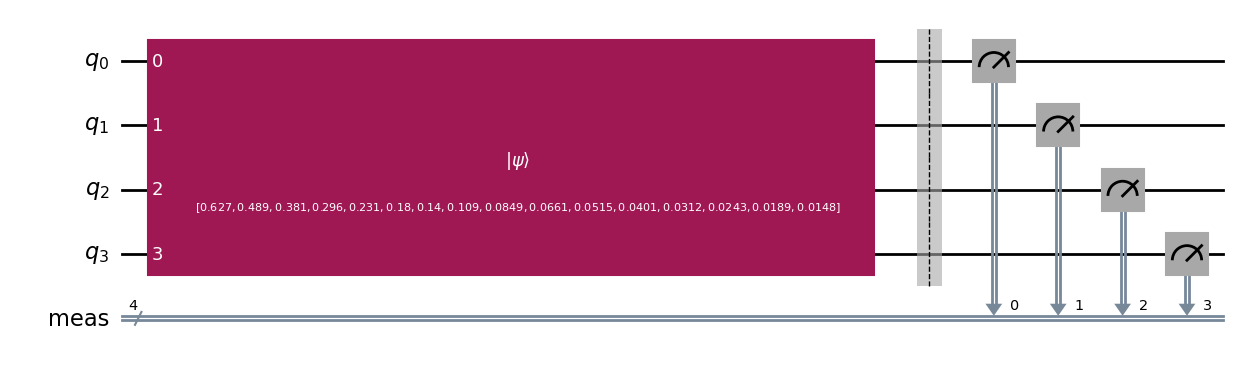


--- Decomposing the circuit to expose the 'initialize' gate ---

--- Decomposed Circuit Diagram (Full) ---


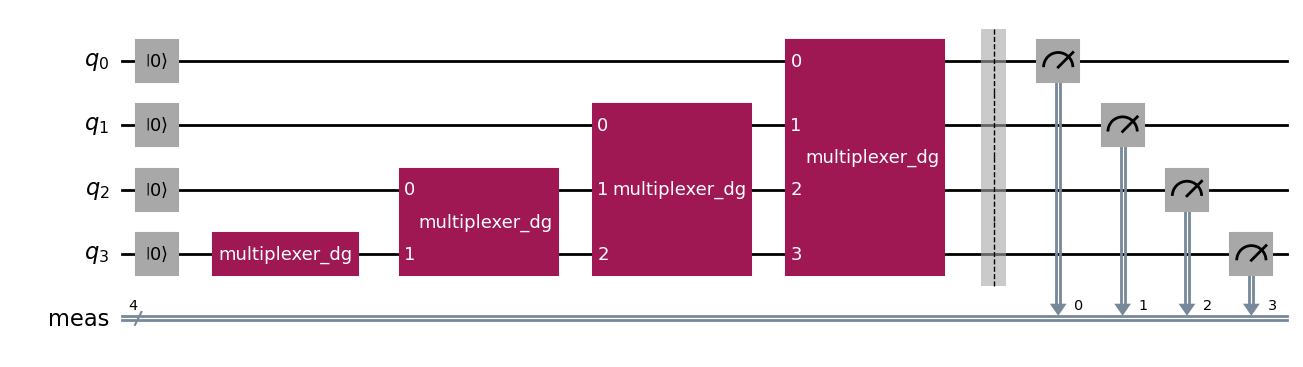


--- Running circuit with Sampler ---

--- Sampler Results (Probabilities) ---
{0: 0.40478515625, 1: 0.2327880859375, 2: 0.14794921875, 3: 0.0853271484375, 4: 0.0521240234375, 5: 0.031005859375, 6: 0.018310546875, 7: 0.011474609375, 8: 0.0059814453125, 9: 0.004638671875, 10: 0.0020751953125, 11: 0.00146484375, 12: 0.0009765625, 13: 0.0003662109375, 14: 0.0003662109375, 15: 0.0003662109375}

--- Generating Final Distribution Histogram ---


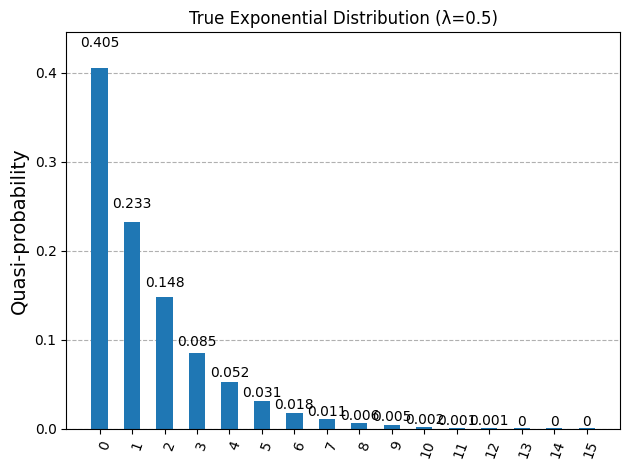


--- Verifying the distribution with a curve fit ---
Fit successful!
Original Lambda: 0.5
Fitted Lambda:   0.5166
R-squared value: 0.999555


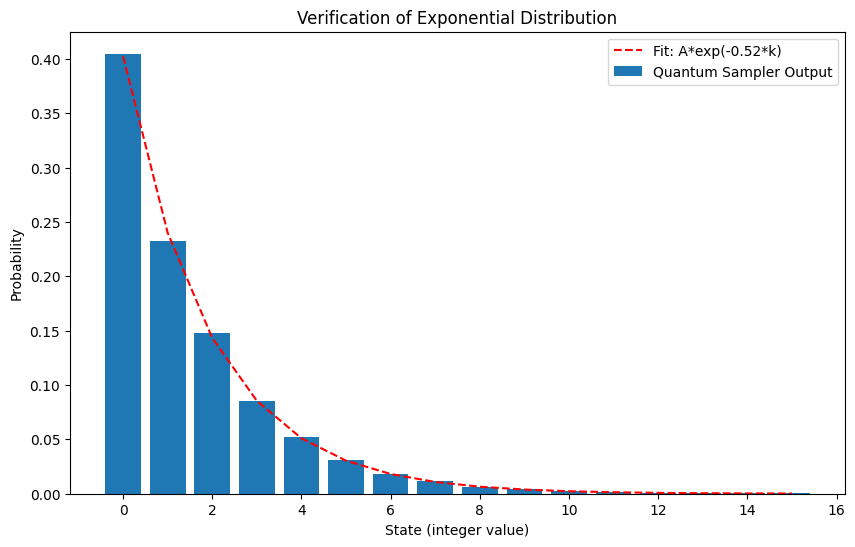

In [19]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.optimize import curve_fit

# --- Check if running in an IPython environment for display() ---
try:
    from IPython.display import display
    IS_IPYTHON = True
except ImportError:
    IS_IPYTHON = False

# --- NEW: Function to create a true exponential distribution ---
def create_exponential_distribution_circuit(num_qubits: int, decay_lambda: float):
    """
    Generates a circuit that prepares a true exponential probability distribution.

    Args:
        num_qubits: The number of qubits to use. The distribution will have 2**num_qubits points.
        decay_lambda: The decay parameter (lambda) for the exponential distribution P(k) ~ exp(-lambda*k).

    Returns:
        A Qiskit QuantumCircuit object.
    """
    # 1. Classically compute the desired state vector amplitudes
    num_states = 2**num_qubits
    # P(k) = A * exp(-lambda * k) -> amplitude is sqrt(P(k))
    amplitudes = np.exp(-decay_lambda * np.arange(num_states) / 2)

    # 2. Normalize the amplitudes to create a valid quantum state vector
    norm = np.linalg.norm(amplitudes)
    initial_state = amplitudes / norm

    # 3. Create the circuit and initialize the state
    qc = QuantumCircuit(num_qubits)
    qc.initialize(initial_state, range(num_qubits))
    qc.measure_all() # Add measurement to all qubits

    return qc

# --- Main execution block ---
if __name__ == '__main__':
    # --- Parameters ---
    N_QUBITS = 4 # This will give 2**4 = 16 bins
    DECAY_LAMBDA = 0.5 # Controls how quickly the distribution decays

    # --- Generate the circuit ---
    print(f"--- Generating circuit for a true exponential distribution with lambda={DECAY_LAMBDA} ---")
    exp_circuit = create_exponential_distribution_circuit(N_QUBITS, DECAY_LAMBDA)

    # --- Display the original circuit diagram (with the initialize block) ---
    print("\n--- Original Circuit Diagram (Condensed) ---")
    circuit_diagram_original = exp_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram_original)
    else:
        circuit_diagram_original.savefig("exponential_circuit_original.png")
        print("Saved original circuit diagram to exponential_circuit_original.png")

    # --- Decompose the circuit to show the full gate implementation ---
    print("\n--- Decomposing the circuit to expose the 'initialize' gate ---")
    # We chain .decompose() multiple times to ensure full breakdown to basic gates.
    decomposed_circuit = exp_circuit.decompose().decompose().decompose()

    # --- Display the decomposed circuit diagram ---
    print("\n--- Decomposed Circuit Diagram (Full) ---")
    circuit_diagram_decomposed = decomposed_circuit.draw(output='mpl', fold=-1)
    if IS_IPYTHON:
        display(circuit_diagram_decomposed)
    else:
        # Save the figure if not in a notebook
        circuit_diagram_decomposed.savefig("exponential_circuit_decomposed.png")
        print("Saved decomposed circuit diagram to exponential_circuit_decomposed.png")


    # --- Run the original circuit with the Sampler ---
    print("\n--- Running circuit with Sampler ---")
    sampler = Sampler()
    # We run the original (non-decomposed) circuit, as it's more efficient for the simulator
    job = sampler.run(exp_circuit, shots=8192)
    result = job.result()

    # --- Process and plot the results ---
    # The sampler gives probabilities directly for the measured states
    probabilities = result.quasi_dists[0].binary_probabilities()

    # Convert binary keys to integers for plotting
    int_probabilities = {int(k, 2): v for k, v in probabilities.items()}

    print("\n--- Sampler Results (Probabilities) ---")
    print({k: v for k, v in sorted(int_probabilities.items())})

    print("\n--- Generating Final Distribution Histogram ---")
    histogram_figure = plot_histogram(int_probabilities, title=f"True Exponential Distribution (λ={DECAY_LAMBDA})")
    if IS_IPYTHON:
        display(histogram_figure)
    else:
        histogram_figure.savefig("exponential_histogram.png")
        print("Saved histogram to exponential_histogram.png")

    # --- Optional: Curve fitting to verify the result ---
    print("\n--- Verifying the distribution with a curve fit ---")

    def exp_func(k, A, lam):
        return A * np.exp(-lam * k)

    # Prepare data for fitting
    x_data = np.array(sorted(int_probabilities.keys()))
    y_data = np.array([int_probabilities[k] for k in x_data])

    # Perform the curve fit
    try:
        params, covariance = curve_fit(exp_func, x_data, y_data, p0=[1, DECAY_LAMBDA])
        A_fit, lambda_fit = params

        print(f"Fit successful!")
        print(f"Original Lambda: {DECAY_LAMBDA}")
        print(f"Fitted Lambda:   {lambda_fit:.4f}")

        # Calculate R-squared value for goodness of fit
        residuals = y_data - exp_func(x_data, *params)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y_data - np.mean(y_data))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print(f"R-squared value: {r_squared:.6f}")

        # Plot the fit
        plt.figure(figsize=(10, 6))
        plt.bar(x_data, y_data, label='Quantum Sampler Output', zorder=1)
        plt.plot(x_data, exp_func(x_data, *params), 'r--', label=f'Fit: A*exp(-{lambda_fit:.2f}*k)', zorder=2)
        plt.title("Verification of Exponential Distribution")
        plt.xlabel("State (integer value)")
        plt.ylabel("Probability")
        plt.legend()
        if IS_IPYTHON:
            plt.show()
        else:
            plt.savefig("fit_verification.png")
            print("Saved fit verification plot to fit_verification.png")

    except RuntimeError:
        print("Curve fit failed. The data may not be suitable for an exponential fit.")

    # Close all plots
    plt.close('all')



## References

This section provides a list of key resources and academic papers that informed the development and analysis presented in this notebook.

- **Universal Statistical Simulator Paper**: The foundational paper for the Quantum Galton Board model used in this project.
  - *Reference*: [Universal Statistical Simulator (Paper)](https://arxiv.org/abs/2202.01735)

- **Qiskit Transpiler Documentation**: Official documentation for Qiskit's transpilation process, which optimizes quantum circuits for specific hardware.
  - *Reference*: [Qiskit Transpiler Documentation](https://quantum.cloud.ibm.com/docs/api/qiskit/transpiler )
  - *Further Reading*: [Introduction to transpilation](https://quantum.cloud.ibm.com/docs/guides/transpile ), [Transpiler stages](https://quantum.cloud.ibm.com/docs/guides/transpiler-stages )

- **Qiskit AI-Transpiler**: Information regarding IBM Quantum's experimental AI-powered transpiler passes.
  - *Reference*: [Optimize quantum circuits with AI-powered transpiler passes](https://www.ibm.com/quantum/blog/ai-transpiler-passes )
  - *GitHub Repository*: [Qiskit/qiskit-ibm-transpiler](https://github.com/Qiskit/qiskit-ibm-transpiler )

- **Qiskit**: The open-source quantum computing software development framework used for building and running quantum circuits.
  - *Reference*: [Qiskit Official Website](https://qiskit.org/ )

- **Quantum Walks**: For a general understanding of quantum walks and their applications.
  - *Reference*: [Quantum Walks - Wikipedia](https://en.wikipedia.org/wiki/Quantum_walk )

- **Monte Carlo Methods**: For background on classical Monte Carlo simulations.
  - *Reference*: [Monte Carlo method - Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method )

- **Total Variation Distance**: For a deeper understanding of this statistical metric.
  - *Reference*: [Total variation distance - Wikipedia](https://en.wikipedia.org/wiki/Total_variation_distance )

- **Jensen-Shannon Divergence**: For a deeper understanding of this statistical metric.
  - *Reference*: [Jensen–Shannon divergence - Wikipedia](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence )

- **Wasserstein Distance**: For a deeper understanding of this statistical metric.
  - *Reference*: [Wasserstein metric - Wikipedia](https://en.wikipedia.org/wiki/Wasserstein_metric )
